<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [17]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [20]:
df=df.dropna()

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [21]:
df['proportion_spending']=df['INSTRUCTION_EXPENDITURE']/df['TOTAL_EXPENDITURE']
df['proportion_spending']

561     0.531638
562     0.474154
563     0.452621
564     0.545428
565     0.494755
          ...   
1219    0.543399
1220    0.477542
1221    0.524924
1222    0.495381
1223    0.461237
Name: proportion_spending, Length: 355, dtype: float64

Final feature list: **Combining features: proportion spending
Binning: years
**

Feature selection justification: **I picked combining features as my methof of creating because the data makes more sense as a proportion rather than an absolute value the same way unemployment rate is a better indicator than aboslute unemployment. This is going to be my sole feature: proportion spending. I am also going to bin with respect to time periods to help create a smoother curve**

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, '8th grade math score over time')

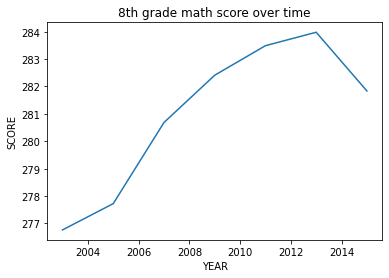

In [22]:
df.groupby('YEAR').AVG_MATH_8_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade math score over time')

**This shows how over the years the math score has improved and is also trying to correlate with imporving tech**

Visualization 2

Text(0, 0.5, '8th grade math score')

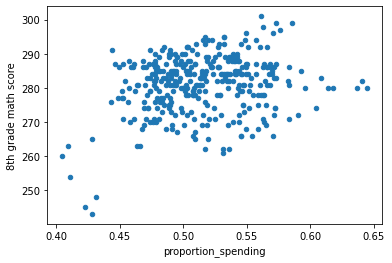

In [23]:
df.plot.scatter(x='proportion_spending',y='AVG_MATH_8_SCORE')
plt.xlabel('proportion_spending')
plt.ylabel('8th grade math score')

** This is a scatter plot of the how the average math scores are comapred to the proportion of sneding
it is not strictly increasing like one would expect!**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df[['proportion_spending','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [31]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [32]:
# create your model here
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'AVG_MATH_8_SCORE')

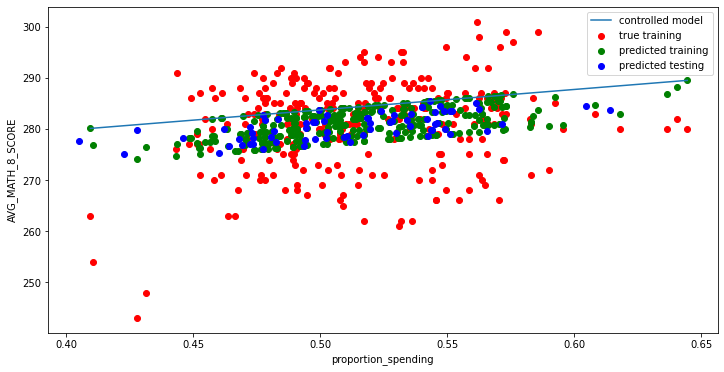

In [35]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'proportion_spending'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')

<h2> Summary </h2>

**We were trying to create a linear relationship between the proportion of spending on education and the average scores for 8th grade math. This regression model also includes year to try and create a corrrelation between the year and the average math 8 score for the states. We expected to see a positive slope between the score and proportion spending and that does seem to be the case here. The intercept is not revealed becuase we dont have a 0% proprotion spending because boy that would be bad.**